In [9]:
from ultralytics import YOLO
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import time
import pandas as pd


0: 384x640 2 persons, 1 refrigerator, 92.1ms
Speed: 5.2ms preprocess, 92.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


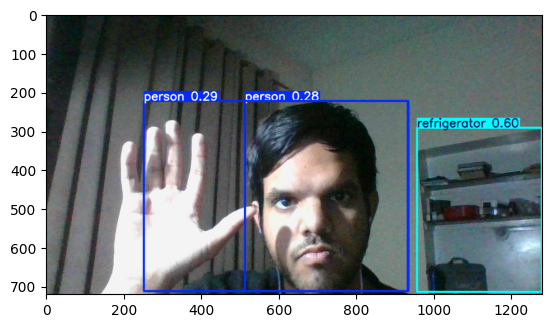

In [10]:
#Task 1 Segmentation
img = cv.imread("pic1.jpg")
seg_model = YOLO('yolov8n.pt')

pred = seg_model.predict(img)

plt.imshow(pred[0].plot()[:,:,::-1])
plt.show()


0: 384x640 2 persons, 1 refrigerator, 122.7ms
Speed: 4.1ms preprocess, 122.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


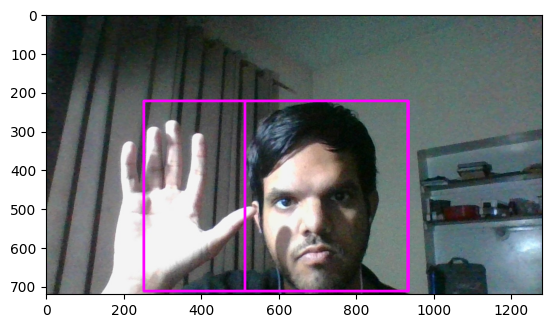

In [14]:
#Task 2
img = cv.imread("pic1.jpg")
pred = seg_model.predict(img)
names = pred[0].names

ids = []
x1s = []
y1s = []
x2s = []
y2s = []
classes = []
confidence = []

for i in range(len(pred[0].boxes)):
    if names[int(pred[0].boxes[i].cls)] == "person":
        x1,y1,x2,y2 = pred[0].boxes[i].xyxy[0]
        #Drawing a rectangle around the object
        cv.rectangle(img, np.uint32((x1,y1)), np.uint32((x2,y2)), (255, 0, 255), thickness= 6)

        x1s.append(int(x1))
        x2s.append(int(x2))
        y1s.append(int(y1))
        y2s.append(int(y2))
        classes.append(names[int(pred[0].boxes[i].cls)])
        ids.append(pred[0].boxes[i].id)
        confidence.append(float(pred[0].boxes[i].conf))

plt.imshow(img[:,:,::-1])
plt.show()

#Task 3
data = {"ID": ids, "X1": x1s, "X2": x2s, "Y1": y1s, "Y2": y2s, "Class": classes, "Confidence": confidence}
csvFile = pd.DataFrame(data)
csvFile.to_csv("Lab13.csv")

In [ ]:
#Task 4
cap = cv.VideoCapture(0)

width  = cap.get(cv.CAP_PROP_FRAME_WIDTH)   # float `width`
height = cap.get(cv.CAP_PROP_FRAME_HEIGHT)  # float `height`
writeto = cv.VideoWriter(r"C:\Users\Taimoor\out_cameras.mp4",  cv.CAP_FFMPEG, cv.VideoWriter.fourcc('X','V','I','D'), 20, np.uint32((width, height)))
i = 0

print("started")
start = time.time()
while ((time.time() - start) < 10):
    ret, img = cap.read()
    results = seg_model.predict(img)
    i = i + 1
    
    plot = results[0].plot()
    writeto.write(plot)

    cv.imshow("camera", plot)

cv.destroyAllWindows()
writeto.set(cv.CAP_PROP_FPS, int(i/10))
writeto.release()
cap.release()
